In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

In [4]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
df_tsla = pdr.get_data_yahoo('TSLA', start, end)
df_tsla

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000
2018-03-02,21.798668,22.348000,21.531334,22.341333,22.341333,76392000
...,...,...,...,...,...,...
2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200
2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600
2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500


In [5]:
##simple moving average

<AxesSubplot:xlabel='Date'>

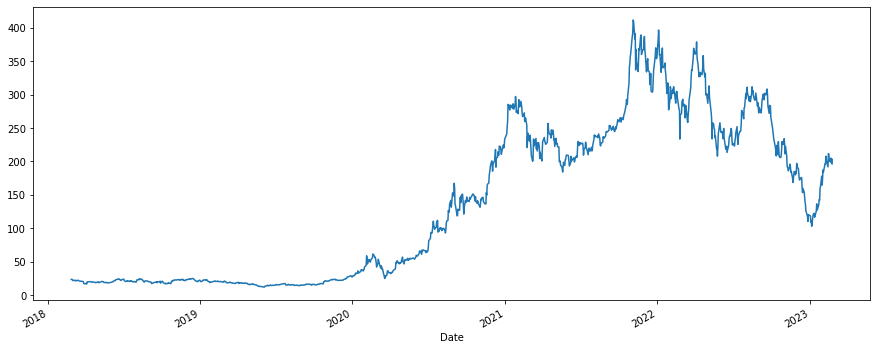

In [6]:
df_tsla['Open'].plot(figsize = (15,6))

### Simple Moving Average
SMA is the easiest moving average to construct. It is simply the average price over the specified period. The average is called "moving" because it is plotted on the chart bar by bar, forming a line that moves along the chart as the average value changes.

Disavdantage: Gives equal weightage to all the data

In [7]:
df_tsla['Open: 10 days rolling'] = df_tsla['Open'].rolling(window = 10, min_periods = 1).mean()
df_tsla.head(20)

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling
Date,,,,,,,
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000,23.566668
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000,23.658334
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500,23.607112
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000,23.455501
2018-03-02,21.798668,22.348000,21.531334,22.341333,22.341333,76392000,23.124134
2018-03-05,22.159332,22.516666,21.952667,22.223333,22.223333,57357000,22.963334
2018-03-06,22.250000,22.424667,21.802000,21.879999,21.879999,64285500,22.861429
2018-03-07,21.695999,22.166668,21.449333,22.153334,22.153334,75109500,22.715750
2018-03-08,22.190666,22.219999,21.751333,21.940001,21.940001,53493000,22.657408


In [8]:
df_tsla['Open: 30 days rolling'] = df_tsla['Open'].rolling(window = 30, min_periods = 1).mean()
df_tsla['Open: 50 days rolling'] = df_tsla['Open'].rolling(window = 50, min_periods = 1).mean()

<AxesSubplot:xlabel='Date'>

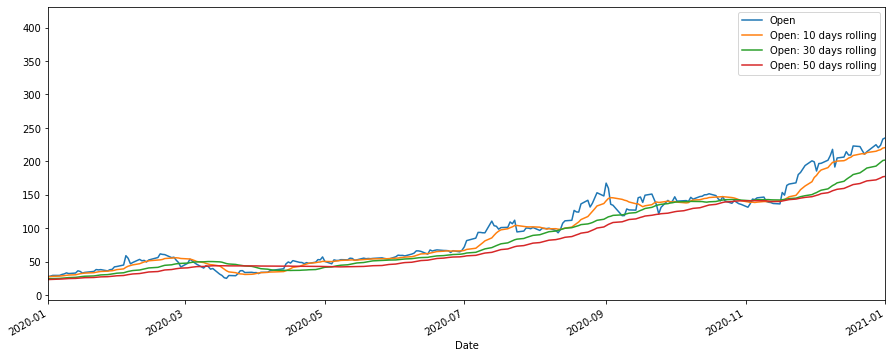

In [9]:
df_tsla[['Open','Open: 10 days rolling', 'Open: 30 days rolling',
       'Open: 50 days rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

### Cummulative Moving Average

<AxesSubplot:xlabel='Date'>

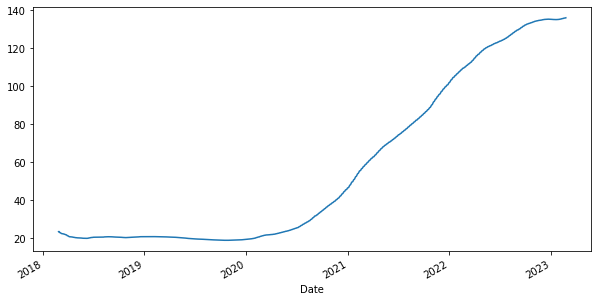

In [10]:
##Expanding
###CMA
df_tsla['Open'].expanding().mean().plot(figsize = (10,5))

### Exponential Moving Average
Formula : ((Close - Prev EMA)* multiplier) + Prev EMA

First EMA would be just a normal average of window size items

Multiplier: 2/ (EMA window size + 1)

Alpha: smoothing factor

In [11]:
df_tsla['EMA'] = df_tsla['Open'].ewm(alpha = 0.1, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

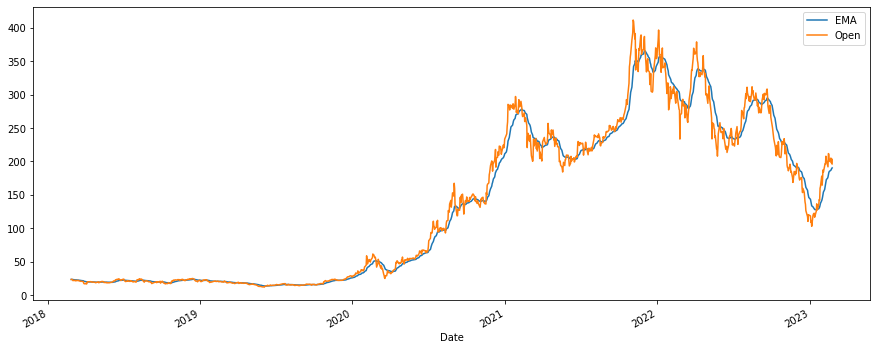

In [13]:
df_tsla[['EMA','Open']].plot(figsize = (15, 6))

In [14]:
df_tsla['EMA_0.3'] = df_tsla['Open'].ewm(alpha = 0.3, adjust = False).mean() #smoothing factor

<AxesSubplot:xlabel='Date'>

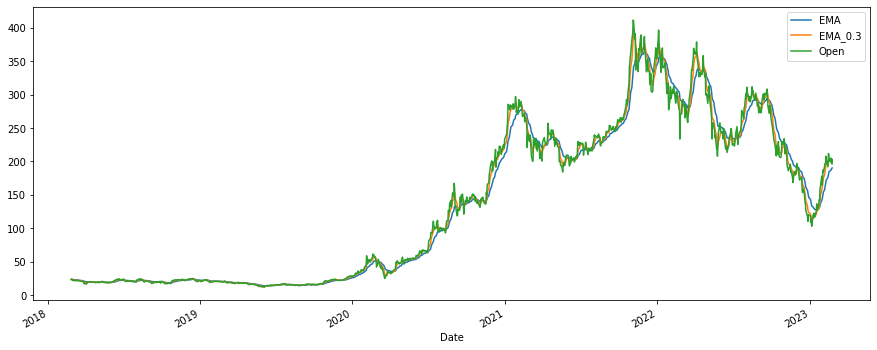

In [15]:
df_tsla[['EMA','EMA_0.3','Open']].plot(figsize = (15, 6))

### Exponential Weighted Moving Average
EWMA (t) = a * x(t) + (1-a) EWMA(t-1)

    a: Here a is the weight which given to the recent data rather previous one. which will prevent lags

In [16]:
df_tsla['EMA_5days'] = df_tsla['Open'].ewm(span = 5).mean()

<AxesSubplot:xlabel='Date'>

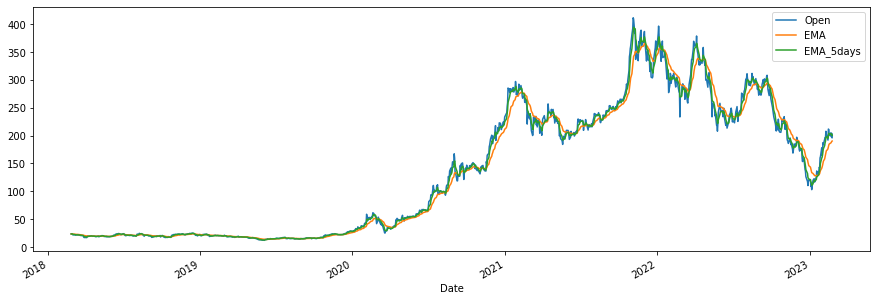

In [17]:
df_tsla[['Open','EMA','EMA_5days']].plot(figsize = (15,5))